## Data Import

In [ ]:
import numpy as np
import pandas as pd
import ast

data=pd.read_excel("https://docs.google.com/uc?id=1rwW3roc-ELRu-KDtau7NUz-GCF2M1yJJ")
for i in data.columns[6:9]:
  print(i)
  data[i] = data[i].apply(ast.literal_eval)
for i in data.columns[10:13]:
  print(i)
  data[i] = data[i].apply(ast.literal_eval)
print("type liste done")
data.head()

avis_token
avis_token_correct
avis_token_correct_sw
avis_token_en
avis_token_correct_en
avis_token_correct_en_sw
type liste done


,note,produit,assureur,date_com,date_xp,avis,avis_token,avis_token_correct,avis_token_correct_sw,avis_en,avis_token_en,avis_token_correct_en,avis_token_correct_en_sw,avis_clean_final,avis_clean_final_en
0,5,auto,Direct Assurance,2021-09-06,2021-09-21,"meilleurs assurances, prix, solutions, écoute,...","[meilleurs, assurances, prix, solutions, écout...","[meilleurs, assurances, prix, solutions, écout...","[meilleurs, assurances, prix, solutions, écout...","best insurance, price, solutions, listening, s...","[best, insurance, price, solutions, listening,...","[best, insurance, price, solutions, listening,...","[best, insurance, price, solutions, listening,...",meilleurs assurances prix solutions écoute rap...,best insurance price solutions listening speed...
1,4,auto,Direct Assurance,2021-05-03,2021-05-21,"je suis globalement satisfait , sauf que vous ...","[je, suis, globalement, satisfait, sauf, que, ...","[je, suis, globalement, satisfait, sauf, que, ...","[globalement, satisfait, sauf, problème, site,...","i am generally satisfied, except that you have...","[i, am, generally, satisfied, except, that, yo...","[i, am, generally, satisfied, except, that, yo...","[i, generally, satisfied, except, problem, web...",globalement satisfait sauf problème site inter...,i generally satisfied except problem website i...
2,5,auto,Direct Assurance,2021-03-21,2021-03-21,prix tres abordable plusieurs options s'offren...,"[prix, tres, abordable, plusieurs, options, s,...","[prix, tres, abordable, plusieurs, options, s,...","[prix, tres, abordable, plusieurs, options, of...",very affordable price several options are avai...,"[very, affordable, price, several, options, ar...","[very, affordable, price, several, options, ar...","[very, affordable, price, several, options, av...",prix tres abordable plusieurs options offrent ...,very affordable price several options availabl...
3,4,auto,L'olivier Assurance,2021-06-10,2021-06-21,"je satisfait du service, une réponse très rapi...","[je, satisfait, du, service, une, réponse, trè...","[je, satisfait, du, service, une, réponse, trè...","[satisfait, service, réponse, très, rapide, se...","i satisfy the service, a very fast response fr...","[i, satisfy, the, service, a, very, fast, resp...","[i, satisfy, the, service, a, very, fast, resp...","[i, satisfy, service, fast, response, service,...",satisfait service réponse très rapide service ...,i satisfy service fast response service i than...
4,1,auto,Matmut,2017-01-29,2017-01-21,"client depuis plus de 25 ans, très déçu de cet...","[client, depuis, plus, de, 25, ans, très, déçu...","[client, depuis, plus, de, 25, ans, très, déçu...","[client, depuis, plus, 25, ans, très, déçu, ce...","customer for more than 25 years, very disappoi...","[customer, for, more, than, 25, years, very, d...","[customer, for, more, than, 25, years, very, d...","[customer, 25, years, disappointed, mutual, lo...",client depuis plus 25 ans très déçu cette mutu...,customer 25 years disappointed mutual longer m...


## Numerous & Date Exploration

In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

data1=data.groupby('produit')['note'].agg(['count','mean']).reset_index().sort_values(by=['count'],ascending=False)
assureur=data1["produit"]
count=data1["count"]
mean=data1["mean"].round(2)

fig = go.Figure()

fig.add_trace(go.Bar(x=assureur,
                y=count,
                yaxis='y',
                text=count,
                name='reviews count',
                marker_color='rgb(55, 83, 109)',
                offsetgroup=1,))

fig.add_trace(go.Bar(x=assureur,
                y=mean,
                yaxis='y2',
                text=mean,
                name='reviews score mean',
                marker_color='rgb(26, 118, 255)',
                offsetgroup=2,))

fig.update_layout(
    title='Number and mean score of reviews by product ',
    xaxis_tickfont_size=14,
    yaxis=dict(
        title='Reviews count',
        titlefont_size=16,
        tickfont_size=14),
    yaxis2=dict(
        title='Reviews score',
        titlefont_size=16,
        tickfont_size=14,
        overlaying= 'y',
        side="right"),

    legend=dict(
        x=0,
        y=1.0,
        bgcolor='rgba(255, 255, 255, 0)',
        bordercolor='rgba(255, 255, 255, 0)'
    ),
    barmode='group',
    bargap=0.15, # gap between bars of adjacent location coordinates.
    bargroupgap=0.1 # gap between bars of the same location coordinate.
)

fig.show()

In [ ]:
data1=data.groupby('assureur')['note'].agg(['count','mean']).reset_index().sort_values(by=['mean'],ascending=False)

assureur=data1["assureur"]
count=data1["count"]
mean=data1["mean"].round(2)

fig = go.Figure()

fig.add_trace(go.Bar(x=assureur,
                y=count,
                yaxis='y',
                text=count,
                name='reviews count',
                marker_color='rgb(55, 83, 109)',
                offsetgroup=1,))

fig.add_trace(go.Bar(x=assureur,
                y=mean,
                yaxis='y2',
                text=mean,
                name='reviews score mean',
                marker_color='rgb(26, 118, 255)',
                offsetgroup=2,))

fig.update_layout(
    title='Number and mean score of reviews by insurance company ',
    xaxis_tickfont_size=14,
    yaxis=dict(
        title='Reviews count',
        titlefont_size=16,
        tickfont_size=14),
    yaxis2=dict(
        title='Reviews score',
        titlefont_size=16,
        tickfont_size=14,
        overlaying= 'y',
        side="right"),

    legend=dict(
        x=0,
        y=1.0,
        bgcolor='rgba(255, 255, 255, 0)',
        bordercolor='rgba(255, 255, 255, 0)'
    ),
    barmode='group',
    bargap=0.15, # gap between bars of adjacent location coordinates.
    bargroupgap=0.1 # gap between bars of the same location coordinate.
)

fig.show()



In [ ]:
def add_fig(fig,name,row):
    fig.add_trace(
      go.Bar(x=data1[data1["produit"]==name]["assureur"], y=data1[data1["produit"]==name]["count"],marker_color='rgb(55, 83, 109)',text=data1[data1["produit"]==name]["count"].round(2)),
      row=row, col=1
    )
    fig.add_trace(
    go.Bar(x=data1[data1["produit"]==name]["assureur"], y=data1[data1["produit"]==name]["mean"],marker_color='rgb(26, 118, 255)',text=data1[data1["produit"]==name]["mean"].round(2)),
    row=row, col=2
    )
    return fig

data1=data.groupby(['produit','assureur'])['note'].agg(['count','mean']).reset_index().sort_values(by=['produit','mean'],ascending=False)
fig = make_subplots(rows=5, cols=2, subplot_titles=("auto count","auto mean",'sante count','sante mean','moto count','moto  mean','habitation count','habitation  mean','prevoyance count','prevoyance  mean'))
for c,i in enumerate(["auto",'sante','moto','habitation','prevoyance']):
  fig=add_fig(fig,i,c+1)

fig.update_layout(height=2000, title_text="Number and Mean Score each company on the top 5 products",showlegend=False)
fig.show()

In [ ]:
data1=data.copy(deep=True)
data1["date"]=data1["date_com"].apply(lambda x:x.replace(day=1))

data1=data1.groupby('date')['note'].agg(['count','mean']).reset_index().sort_values(by=['date'])
date=data1["date"]
count=data1["count"]
mean=data1["mean"].round(2)

fig = go.Figure()

fig.add_trace(go.Bar(x=date,
                y=count,
                yaxis='y',
                text=count,
                name='reviews count',
                marker_color='rgb(0, 51, 0)',
                offsetgroup=1,))

fig.add_trace(go.Bar(x=date,
                y=mean,
                yaxis='y2',
                text=mean,
                name='reviews score mean',
                marker_color='rgb(0, 153, 0)',
                offsetgroup=2,))

fig.update_layout(
    title='Number and mean score of reviews by date ',
    xaxis_tickfont_size=14,
    yaxis=dict(
        title='Reviews count',
        titlefont_size=16,
        tickfont_size=14),
    yaxis2=dict(
        title='Reviews score',
        titlefont_size=16,
        tickfont_size=14,
        overlaying= 'y',
        side="right"),

    legend=dict(
        x=0,
        y=1.0,
        bgcolor='rgba(255, 255, 255, 0)',
        bordercolor='rgba(255, 255, 255, 0)'
    ),
    barmode='group',
    bargap=0.1, # gap between bars of adjacent location coordinates.
    bargroupgap=0.05 # gap between bars of the same location coordinate.
)

fig.show()



In [ ]:
def add_fig(fig,name,row):
    fig.add_trace(
      go.Bar(x=data1[data1["assureur"]==name]["date"], y=data1[data1["assureur"]==name]["count"],marker_color='rgb(0, 51, 0)',text=data1[data1["assureur"]==name]["count"].round(2)),
      row=row, col=1
    )
    fig.add_trace(
    go.Bar(x=data1[data1["assureur"]==name]["date"], y=data1[data1["assureur"]==name]["mean"],marker_color='rgb(0, 153, 0)',text=data1[data1["assureur"]==name]["mean"].round(2)),
    row=row, col=2
    )
    return fig



data1=data.copy(deep=True)
data1["date"]=data1["date_com"].apply(lambda x:x.replace(day=1))
data1=data1.groupby(['date',"assureur"])['note'].agg(['count','mean']).reset_index().sort_values(by=['date','mean'],ascending=False)
date=data1["date"]
count=data1["count"]
mean=data1["mean"].round(2)
fig = make_subplots(rows=5, cols=2, subplot_titles=("Direct Assurance count","Direct Assurance mean","L'olivier Assurance count","L'olivier Assurance mean",'APRIL moto count','APRIL moto mean','GMF count','GMF mean','Néoliane Santé count','Néoliane Santé mean'))

for c,i in enumerate(["Direct Assurance","L'olivier Assurance",'APRIL Moto','GMF','Néoliane Santé']):
  fig=add_fig(fig,i,c+1)


fig.update_layout(height=2000, title_text="Number and Mean Score foreach company over times",showlegend=False)
fig.show()

In [ ]:
def add_fig(fig,name,row):
    fig.add_trace(
      go.Bar(x=data1[data1["produit"]==name]["date"], y=data1[data1["produit"]==name]["count"],marker_color='rgb(55, 83, 109)',text=data1[data1["produit"]==name]["count"].round(2)),
      row=row, col=1
    )
    fig.add_trace(
    go.Bar(x=data1[data1["produit"]==name]["date"], y=data1[data1["produit"]==name]["mean"],marker_color='rgb(26, 118, 255)',text=data1[data1["produit"]==name]["mean"].round(2)),
    row=row, col=2
    )
    return fig

data1=data.copy(deep=True)
data1["date"]=data1["date_com"].apply(lambda x:x.replace(day=1))
data1=data1.groupby(['date',"produit"])['note'].agg(['count','mean']).reset_index().sort_values(by=['date','mean'],ascending=False)
date=data1["date"]
count=data1["count"]
mean=data1["mean"].round(2)

fig = make_subplots(rows=5, cols=2, subplot_titles=("auto count","auto mean",'sante count','sante mean','moto count','moto  mean','habitation count','habitation  mean','prevoyance count','prevoyance  mean'))
for c,i in enumerate(["auto",'sante','moto','habitation','prevoyance']):
  fig=add_fig(fig,i,c+1)

fig.update_layout(height=2000, title_text="Number and Mean Score over time on the top 5 products",showlegend=False)
fig.show()

## Textual / Review Exploration

In [ ]:
df=data[data["avis_clean_final"].isnull()==False]
df=df[df["avis_clean_final_en"].isnull()==False]
len(df)

24103

### Global BoW - Bag of Words


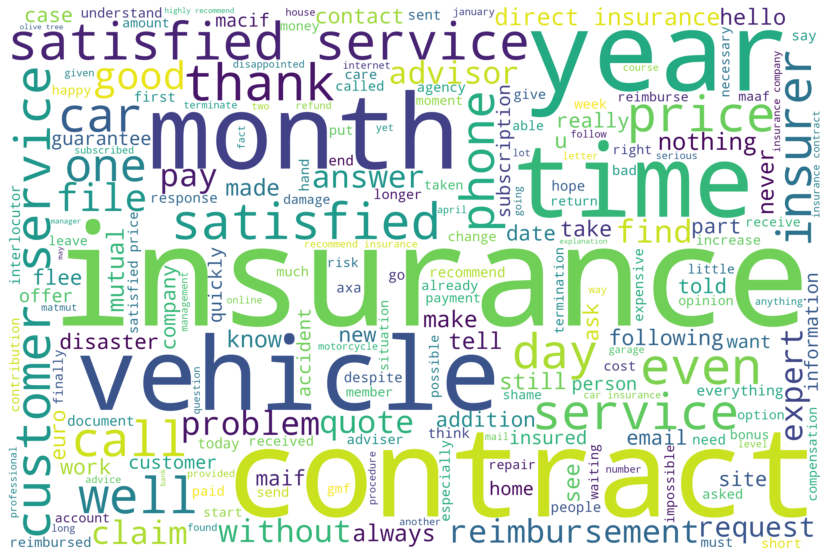

In [ ]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS
stopwords = set(STOPWORDS)
import matplotlib.pyplot as plt

# Create a list of word
text=" ".join(df["avis_clean_final_en"])
# Create the wordcloud object
wordcloud = WordCloud(width = 3000, height = 2000,background_color="white",stopwords=stopwords).generate(text)
# Display the generated image:
plt.figure(figsize = (30,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

###TF-IDF

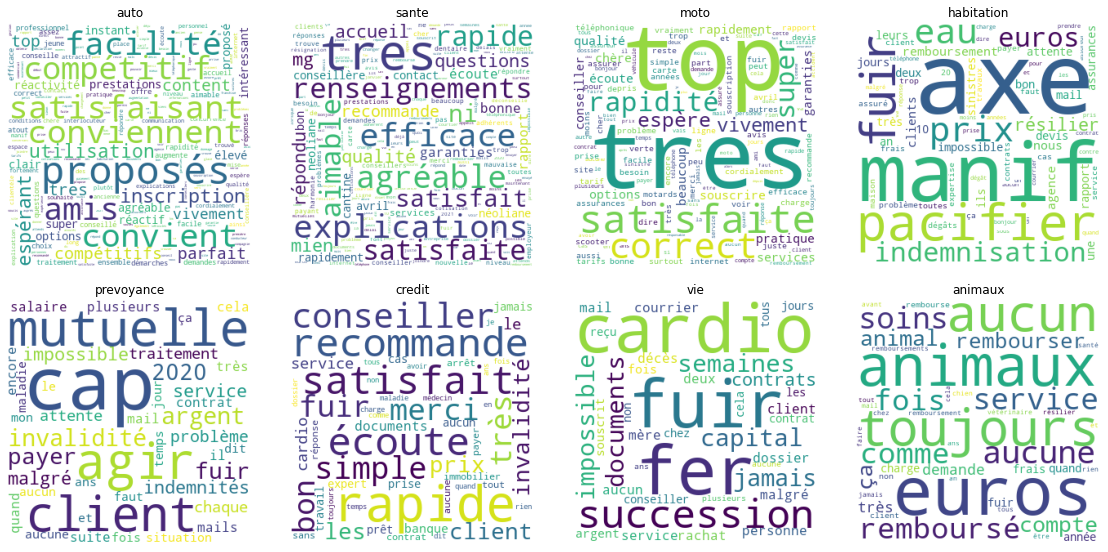

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

def topicWordCloud(i):
  tfIdfVectorizer=TfidfVectorizer(use_idf=True)
  tfIdf = tfIdfVectorizer.fit_transform(df[df["produit"]==i]["avis_clean_final"])
  result = pd.DataFrame(tfIdf.T.todense(), index=tfIdfVectorizer.get_feature_names_out())
  result.replace(0, np.nan, inplace=True)
  result["mean"]= result.mean(axis=1)
  result["count"]=result.count(axis=1)
  result["count"]=result["count"]-1
  wordcloudd=WordCloud(width = 300, height = 300,background_color="white").generate_from_frequencies(result[(result['mean']>0.1) & (result['count']>0.01*len(result))]["mean"].to_dict())
  # Display the generated image:
  return wordcloudd

fig = plt.figure(figsize = (16,8))

for i,x in enumerate(df['produit'].value_counts()[0:8].keys().tolist()):
      ax = fig.add_subplot(2,4,i+1)
      ax.title.set_text(x)
      wordcloudd = topicWordCloud(x)
      ax.imshow(wordcloudd)
      ax.axis('off')

fig.tight_layout(pad=2.0)
plt.show()


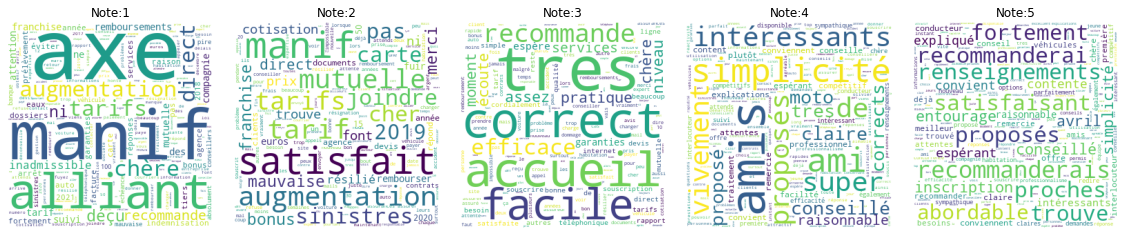

In [ ]:
def topicWordCloud(i):
  tfIdfVectorizer=TfidfVectorizer(use_idf=True)
  tfIdf = tfIdfVectorizer.fit_transform(df[df["note"]==i]["avis_clean_final"])
  result = pd.DataFrame(tfIdf.T.todense(), index=tfIdfVectorizer.get_feature_names_out())
  result.replace(0, np.nan, inplace=True)
  result["mean"]= result.mean(axis=1)
  result["count"]=result.count(axis=1)
  result["count"]=result["count"]-1
  wordcloudd=WordCloud(width = 300, height = 300,background_color="white").generate_from_frequencies(result[(result['mean']>0.10) & (result['count']>0.01*len(result))]["mean"].to_dict())
  # Display the generated image:
  return wordcloudd



fig = plt.figure(figsize = (16,8))

for i,x in enumerate(sorted(df['note'].value_counts().keys().tolist())):
      ax = fig.add_subplot(1,5,i+1)
      ax.title.set_text(f"Note:{x}")
      wordcloudd = topicWordCloud(x)
      ax.imshow(wordcloudd)
      ax.axis('off')

fig.tight_layout(pad=2.0)
plt.show()

### Number of word according to the mark

In [ ]:
note=[]
mean_fr=[]
mean_en=[]
count=[]

for i in range(1,6):
  note.append(i)
  count.append(len(df[df["note"]==i]))
  len_fr=df[df["note"]==i]["avis_token"].str.len().sum()
  len_en=df[df["note"]==i]["avis_token_en"].str.len().sum()
  mean_fr.append(round(len_fr/len(df[df["note"]==i])))
  mean_en.append(round(len_fr/len(df[df["note"]==i])))

In [ ]:
fig = go.Figure(data=[
    go.Bar(name='french reviews', x=note, y=mean_fr,textposition='auto',text=mean_fr),
    go.Bar(name='english reviews', x=note, y=mean_en,textposition='auto',text=mean_en)
])
fig.update_layout(barmode='group',title="Average number of word in french and english reviews")
fig.show()